## Шаг 1. Импорт данных

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sb
from scipy import stats as st
from matplotlib import pyplot as plt
#pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [2]:
data = pd.read_csv('/datasets/games.csv')

### Выводы по шагу 1
Библиотеки загружены, файл прочитан.

## Шаг 2. Подготовьте данные


Замените названия столбцов (приведите к нижнему регистру);
Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

In [3]:
data.info()
data = data.rename(columns=lambda x: x.lower())
data['name'] = data['name'].str.lower()
data['platform'] = data['platform'].str.lower()
data['genre'] = data['genre'].str.lower()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data = data.drop_duplicates()
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y')
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
data['critic_score'] = data['critic_score'].replace('tbd', np.NaN)
data['user_score'] = data['user_score'].astype(float)
data['year_of_release'] = data['year_of_release'].dt.year
data['year_of_release'].isna().sum()
data['year_of_release']

0        2006.0
1        1985.0
2        2008.0
3        2009.0
4        1996.0
          ...  
16710    2016.0
16711    2006.0
16712    2016.0
16713    2003.0
16714    2016.0
Name: year_of_release, Length: 16715, dtype: float64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


Обработайте пропуски при необходимости:
Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
Опишите причины, которые могли привести к пропускам;

In [7]:
data = data.dropna(subset=['year_of_release','name'])
genre_uniq = data['genre'].unique()
genre_uniq


#for i in genre_uniq:
#    med_c = data.loc[data['genre'] == i]['critic_score'].median()
#    med_u = data.loc[data['genre'] == i]['user_score'].median()
#    data.loc[data['genre'] == i,'critic_score'] = data.loc[data['genre'] == i,'critic_score'].fillna(med_c)
#    data.loc[data['genre'] == i,'user_score'] = data.loc[data['genre'] == i,'user_score'].fillna(med_u)


array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy'], dtype=object)

Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [8]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data['total_sales'] = data['total_sales'].replace(0, np.NaN)
data = data.dropna(subset=['total_sales'])

In [9]:
len(data['name'].unique())

11425

In [10]:
year_gap = pd.pivot_table(data,index='year_of_release')
display(year_gap[['critic_score','user_score']])

platform_gap = pd.pivot_table(data,index='platform')
display(platform_gap[['critic_score','user_score']])

,critic_score,user_score
year_of_release,,
1980.0,NaN,NaN
1981.0,NaN,NaN
1982.0,NaN,NaN
1983.0,NaN,NaN
1984.0,NaN,NaN
1985.0,59.000000,5.800000
1986.0,NaN,NaN
1987.0,NaN,NaN
1988.0,64.000000,2.200000


,critic_score,user_score
platform,,
2600,NaN,NaN
3do,NaN,NaN
3ds,67.156627,6.852047
dc,87.357143,8.528571
ds,63.728814,7.022656
gb,NaN,NaN
gba,67.311628,7.669323
gc,69.601831,7.615686
gen,NaN,NaN


### Выводы по шагу 2


<br> Удалены строки с пропусками в названии и дате выхода,
    Пропуски в оценке и рейтиниге отсавлены, так как они относятся к играм и платформам не актуальных для нашего исследования. Заменить их другим значением тоже не представляется возможным, поскольку рейтинг и оценка определяется содержаением игры, чего в дата фрейме не отражено.
    
Все названия стобцов и значения в столбцах приведены в нижний регистр.
    
Удалены дубликаты.
    
Типы данных приведены в соотвестиве с их содержимым.
    
Возможные причины позникновения пропусков:
1)ошибки при заведение данных в таблицу, в названии и годе выпуска.
2)малая известность игры причина почему никто не стал ставить оценки.
    
Посчитаны сумарные продажи во всех регионах в отдельном столбце.
    
</font> 


## Шаг 3. Проведите исследовательский анализ данных


Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?


In [11]:
years_releas = pd.pivot_table(data,values = 'name',index ='year_of_release', aggfunc='count')
years_releas

,name
year_of_release,
1980.0,9
1981.0,46
1982.0,36
1983.0,17
1984.0,14
1985.0,14
1986.0,21
1987.0,16
1988.0,15




<br> По таблице виден постепенный рост выпущенных игр за год, игры до 1994 могут быть проигнорированы.
</font> 


Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?


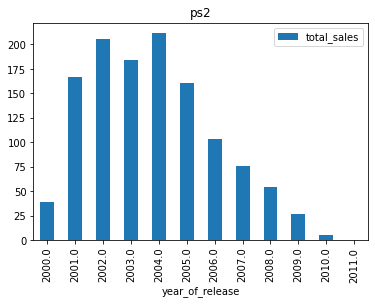

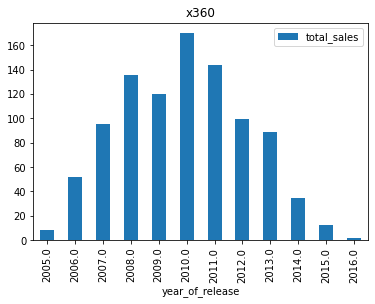

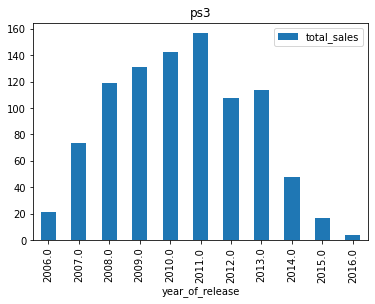

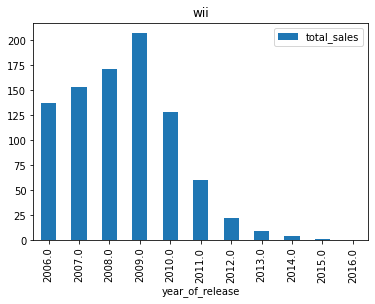

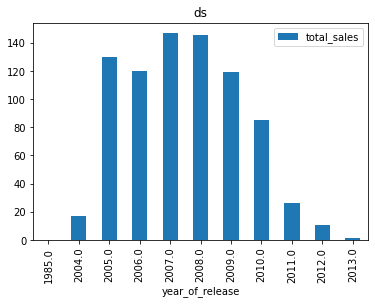

In [12]:
platform_sales = pd.pivot_table(data,values = 'total_sales',index ='year_of_release',columns = 'platform', aggfunc='sum')
sales_per_platform = pd.pivot_table(data,values = 'total_sales',index ='platform', aggfunc='sum')
sales_per_platform.sort_values(by ='total_sales',ascending = False)
top_sale_list = sales_per_platform.nlargest(5,'total_sales').index
for pltfrm in top_sale_list:
    data[['platform','year_of_release','total_sales']].loc[data['platform'] == pltfrm].groupby('year_of_release').sum().plot(kind='bar', title = pltfrm)


<br> Средний рост популярности платформы занимает 4 года,пик приходится на 5 год жизни консоли. Потом также 4 года идет постепенный спад. Такой график наблюдается на платформах с максимальным кол-вом продаж.
</font> 

Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Актуальный период 2013-2016


Замена Nan в столбце "rating" на заглушку 'no_rating'


In [13]:
data['rating'] = data['rating'].fillna('no_rating')

Index(['ps4', 'ps3', 'xone', '3ds', 'x360'], dtype='object', name='platform')

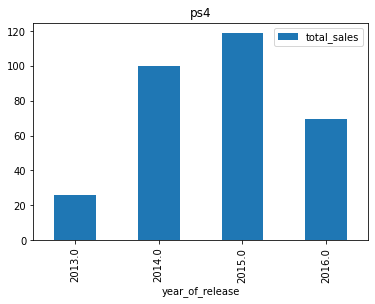

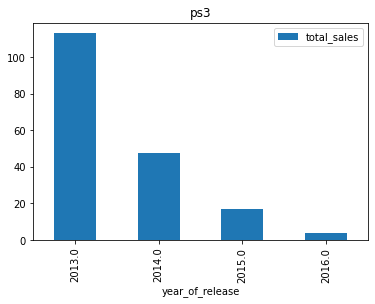

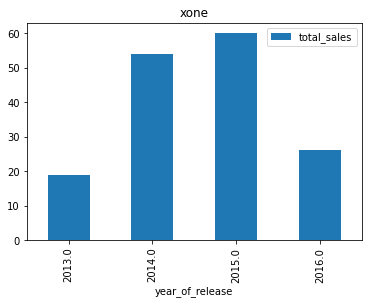

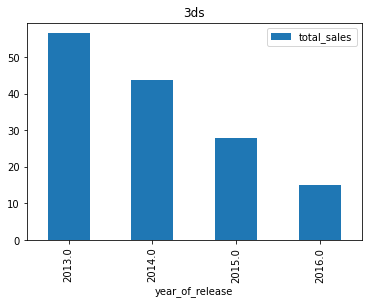

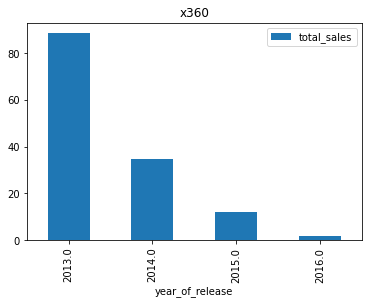

In [14]:
actual_data = data.loc[data['year_of_release']>2012]

actual_data_piv = pd.pivot_table(actual_data,values = 'total_sales',index ='platform', aggfunc='sum')
actual_data_piv.sort_values(by ='total_sales',ascending = False)

for pltfrm in actual_data_piv.nlargest(5,'total_sales').index:
    actual_data[['platform','year_of_release','total_sales']].loc[actual_data['platform'] == pltfrm].groupby('year_of_release').sum().plot(kind='bar', title = pltfrm)
actual_data_piv.nlargest(5,'total_sales').index

Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.



<br> Лидеры по продажам за актуальный период:'ps4', 'ps3', 'xone', '3ds', 'x360'
Рост за актуальный период:'ps4', 'xone'(учитывая неполные данные за 2016)
Падениеза актуальный период:'ps3', '3ds', 'x360'
потенциально прибыльные:'ps4', 'xone'
</font> 

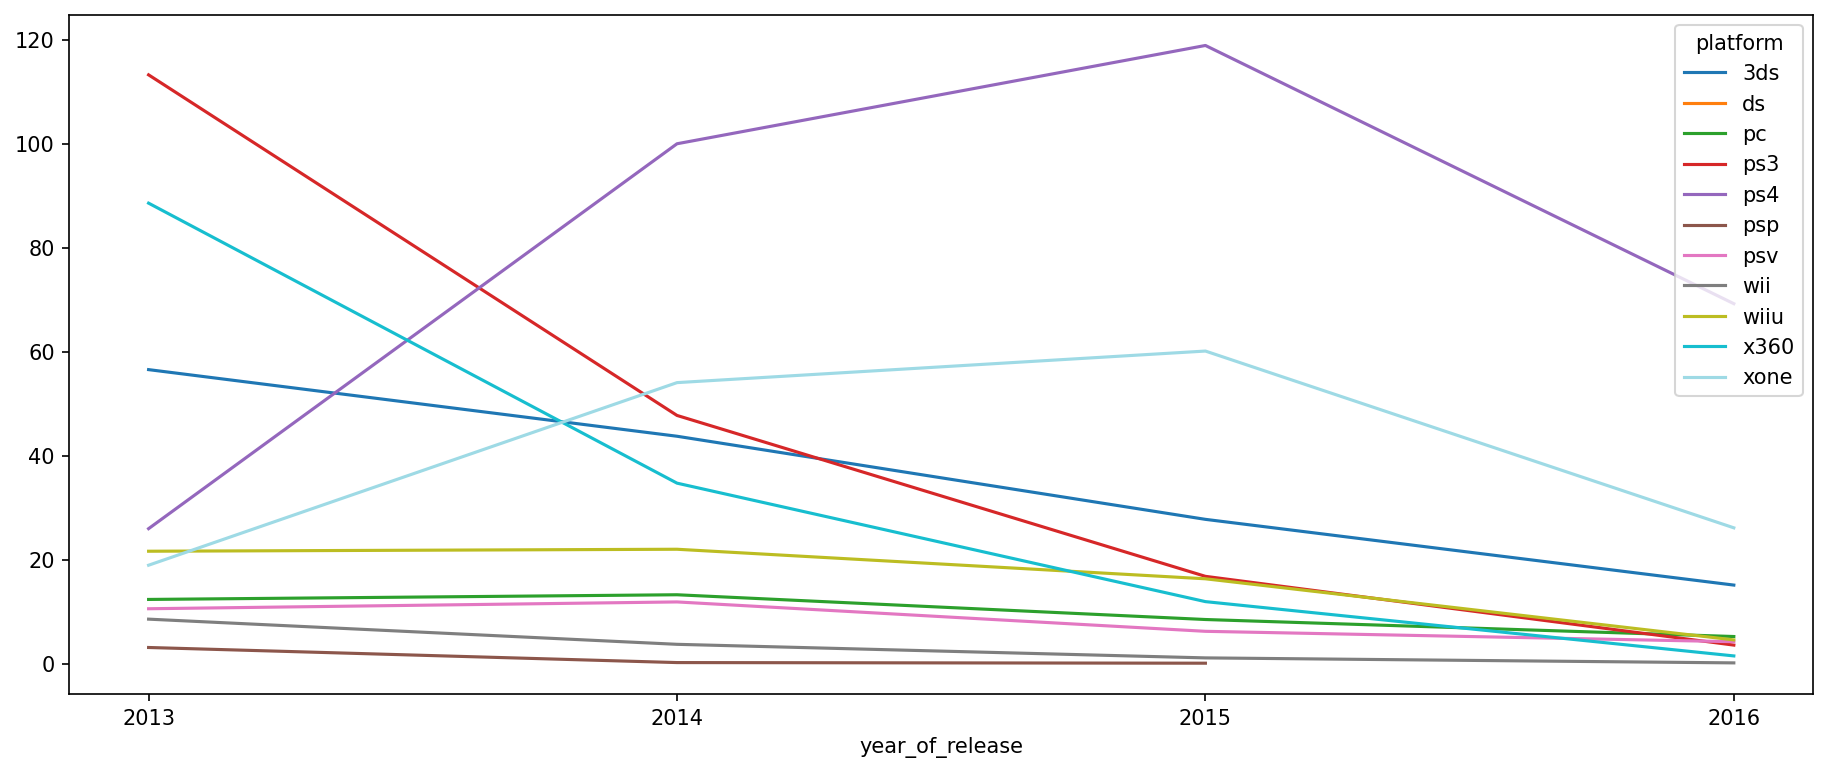

In [15]:


import matplotlib.ticker as ticker

ax = actual_data.astype({'year_of_release' : 'int'}).pivot_table(index='year_of_release',
                                                                 columns='platform',
                                                                 values='total_sales',
                                                                 aggfunc='sum').plot(figsize=(15,6), cmap='tab20')
plt.gcf().set_dpi(150)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.


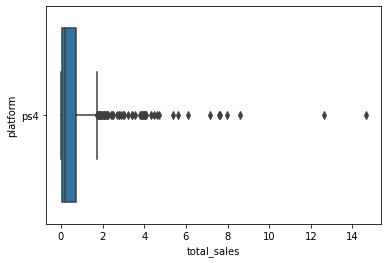

       total_sales
count   392.000000
mean      0.801378
std       1.609456
min       0.010000
25%       0.060000
50%       0.200000
75%       0.730000
max      14.630000
------------------------------------------


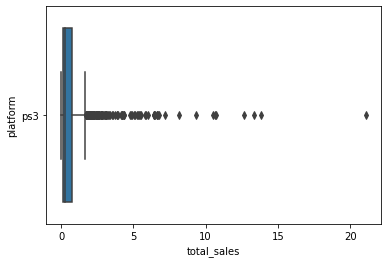

       total_sales
count  1305.000000
mean      0.713670
std       1.403463
min       0.010000
25%       0.110000
50%       0.280000
75%       0.760000
max      21.050000
------------------------------------------


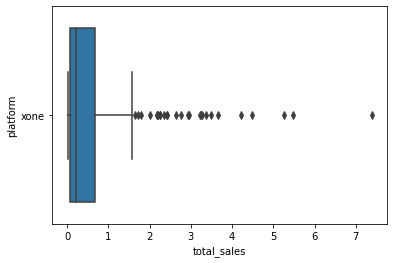

       total_sales
count   247.000000
mean      0.645020
std       1.036139
min       0.010000
25%       0.060000
50%       0.220000
75%       0.685000
max       7.390000
------------------------------------------


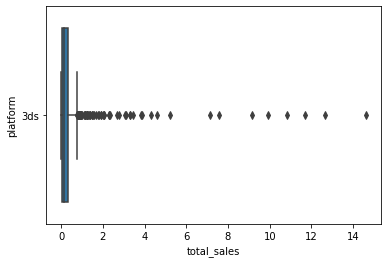

       total_sales
count   512.000000
mean      0.503535
std       1.441271
min       0.010000
25%       0.050000
50%       0.120000
75%       0.332500
max      14.600000
------------------------------------------


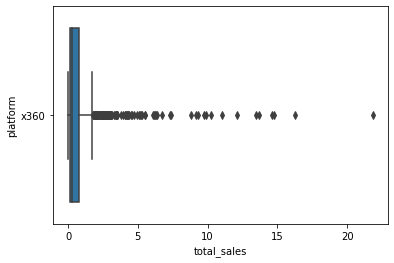

       total_sales
count  1232.000000
mean      0.780227
std       1.632122
min       0.010000
25%       0.110000
50%       0.280000
75%       0.770000
max      21.820000
------------------------------------------


In [16]:
for pltfrm in actual_data_piv.nlargest(5,'total_sales').index:
    sb.boxplot(data=data[['platform','total_sales']].loc[data['platform'] == pltfrm], x="total_sales", y="platform")
    plt.show()
    print(data[['platform','total_sales']].loc[data['platform'] == pltfrm].describe())
    print('------------------------------------------')

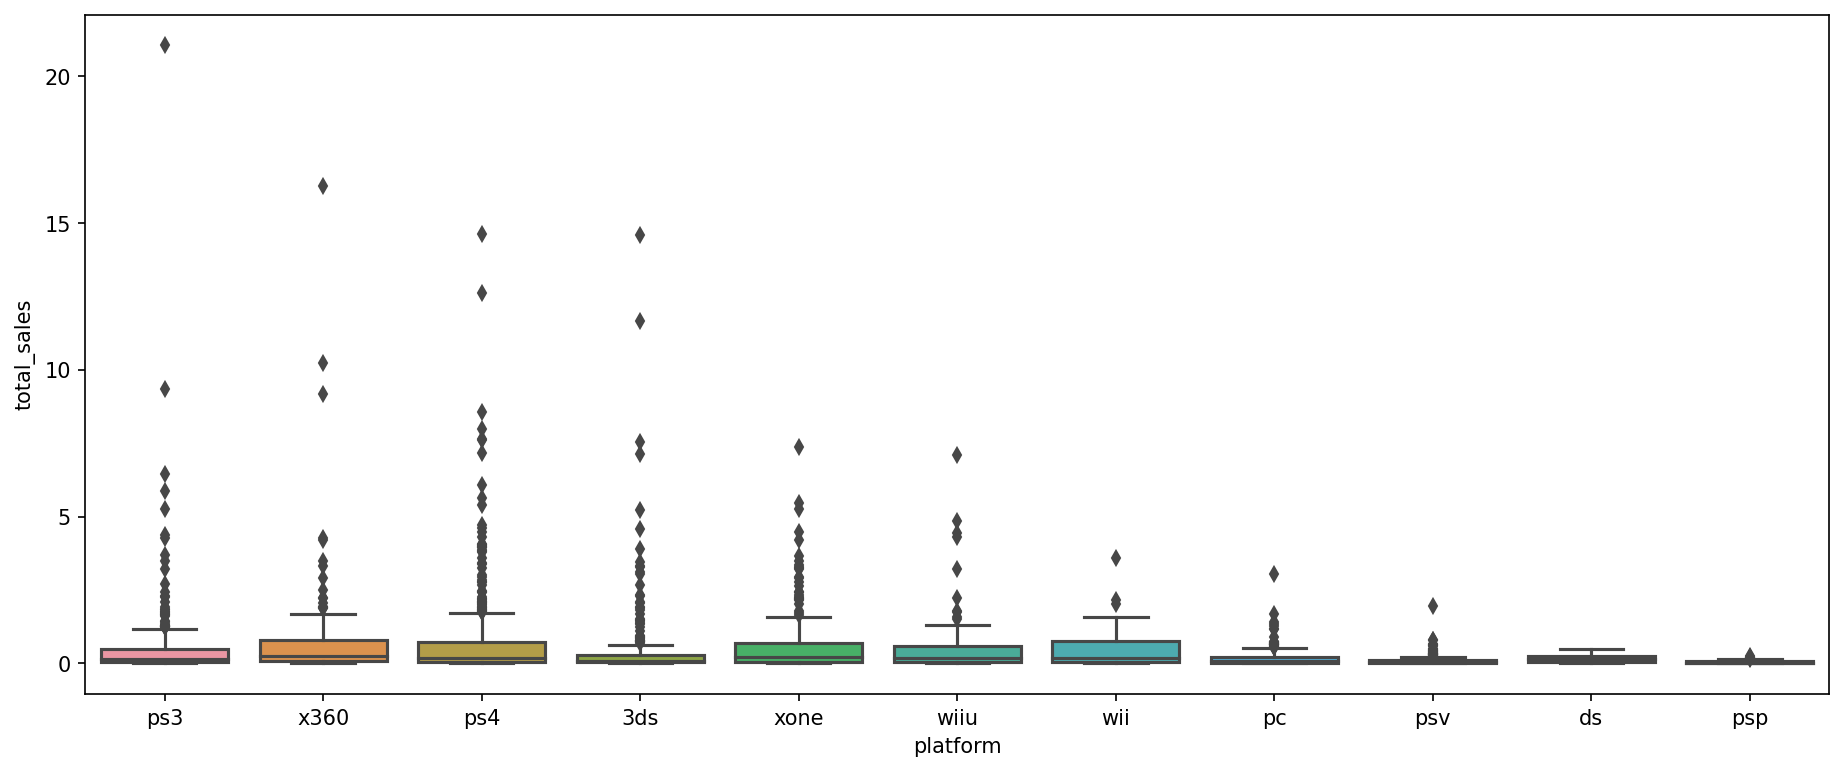

In [17]:


plt.figure(figsize=(15,6))
sb.boxplot(data=actual_data, y='total_sales', x='platform')
plt.gcf().set_dpi(150)



<br> Графики показвают, что для каждой платформы можно найти определнное кол-во хитов которые и собирают основные продажи. При этот игры не поповшие в шорт-лист показывают слабые показатели.Средние продажи по интересующих нас платформ составляют 0.6 млн проданых копий.
</font> 

In [18]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16442 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16442 non-null  object 
 1   platform         16442 non-null  object 
 2   year_of_release  16442 non-null  float64
 3   genre            16442 non-null  object 
 4   na_sales         16442 non-null  float64
 5   eu_sales         16442 non-null  float64
 6   jp_sales         16442 non-null  float64
 7   other_sales      16442 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16442 non-null  object 
 11  total_sales      16442 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.6+ MB


Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.


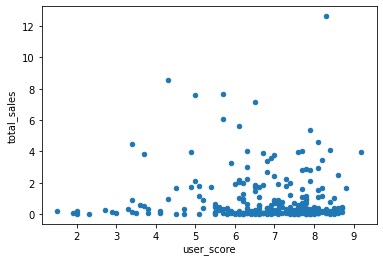

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

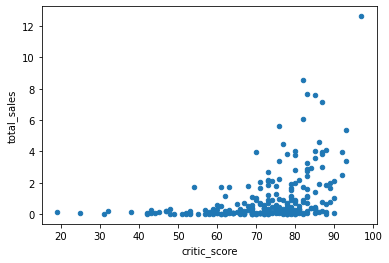

In [19]:
ps4_sales = data[['critic_score','user_score','total_sales']].loc[data['platform']=='ps4']
#ps4_sales_stat = ps4_sales.pivot_table(index = 'name',values =['user_score','critic_score','total_sales'])
ps4_sales.plot(x='user_score',y='total_sales',kind='scatter')
plt.show()
ps4_sales.plot(x='critic_score',y='total_sales',kind='scatter')
#ps4_sales[['critic_score','total_sales']]
#pd.plotting.scatter_matrix(ps4_sales[['user_score','total_sales']], figsize=(9,9))

In [20]:
print(ps4_sales.corr())

              critic_score  user_score  total_sales
critic_score      1.000000    0.557654     0.406568
user_score        0.557654    1.000000    -0.031957
total_sales       0.406568   -0.031957     1.000000



<br> Графики показвают, что чем выше оценка тем больше продаж.Наиболее ярко это выражено для оценок критиков. Оценки пользователей мене влиятельны на продажи, однако лидеры все равно находятся в секторе с высокими оценками.
</font> 

In [21]:

for pltfrm in actual_data_piv.nlargest(5,'total_sales').index:
    print('Матрица корреляций для:',pltfrm)
    print(data[['critic_score','user_score','total_sales']].loc[data['platform']== pltfrm].corr())

Матрица корреляций для: ps4
              critic_score  user_score  total_sales
critic_score      1.000000    0.557654     0.406568
user_score        0.557654    1.000000    -0.031957
total_sales       0.406568   -0.031957     1.000000
Матрица корреляций для: ps3
              critic_score  user_score  total_sales
critic_score      1.000000    0.631154     0.432759
user_score        0.631154    1.000000     0.128416
total_sales       0.432759    0.128416     1.000000
Матрица корреляций для: xone
              critic_score  user_score  total_sales
critic_score      1.000000    0.472462     0.416998
user_score        0.472462    1.000000    -0.068925
total_sales       0.416998   -0.068925     1.000000
Матрица корреляций для: 3ds
              critic_score  user_score  total_sales
critic_score      1.000000    0.745222     0.348740
user_score        0.745222    1.000000     0.222078
total_sales       0.348740    0.222078     1.000000
Матрица корреляций для: x360
              critic_score

Соотнесите выводы с продажами игр на других платформах.



<br> Продажи на других платформах имеют схожие зависимости. Это доказывают таблицы выше. От платформы к платформе меняется интенсивость зависимости однако, она сохраняется.
</font> 

In [22]:
actual_data.groupby('platform')[['user_score','critic_score']].corrwith(actual_data['total_sales']).round(2)

/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,user_score,critic_score
platform,,
3ds,0.24,0.36
ds,NaN,NaN
pc,-0.09,0.20
ps3,0.00,0.33
ps4,-0.03,0.41
psp,-1.00,NaN
psv,0.00,0.25
wii,0.68,NaN
wiiu,0.42,0.38


Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?


In [23]:
genger_piv = actual_data.pivot_table(index='genre', values='total_sales',aggfunc=['count','median'])
genger_piv = genger_piv.set_axis(['count', 'median'], axis=1)
print(genger_piv.sort_values(by='count', ascending=False))

#actual_data.pivot_table(index='genre', values='total_sales',aggfunc=['sum','median']).sort_values(by='total_sales', ascending=False).nlargest(5,'total_sales').index
actual_data

              count  median
genre                      
action          766   0.110
role-playing    292   0.125
adventure       245   0.030
sports          214   0.240
shooter         187   0.450
misc            155   0.100
racing           85   0.120
fighting         80   0.125
platform         74   0.225
simulation       62   0.100
strategy         56   0.080
puzzle           17   0.060


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,ps3,2013.0,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,grand theft auto v,x360,2013.0,action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,call of duty: black ops 3,ps4,2015.0,shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63
33,pokemon x/pokemon y,3ds,2013.0,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,no_rating,14.60
42,grand theft auto v,ps4,2014.0,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
16707,aiyoku no eustia,psv,2014.0,misc,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
16710,samurai warriors: sanada maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
16712,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01



<br> Продажи по жанрам распределены с относительно равноменым уменьшением от игры в жанре action с 1716.52 млн продаж до игр в жанре strategy с 172.57 млн продаж. 

Наиболее интересные для продажи игры жанров:'action', 'sports', 'shooter', 'role-playing', 'platform'

Игры с наиболее низкими продажами:strategy,adventure, puzzle.

Возможно игры с более сложными решениями и в целом заставляющие принимать решения в процессе игры, менее интересны так как не позволяют сразу после запуска начать получать удовольствие от процесса.
    
    
</font> 

### Выводы по шагу 3

<br> 
Цикл жизни платформы составляет около 9 лет, с пиком продаж на 5 год. Также на продажи влияет оценка критиков, выше оценка выше продажи. Наиболее перспективные для разработки в 2017 являются PS4 и XboxOne.Игру стоит выбирать из наиболее популярных жанров таких как: 'action', 'sports', 'shooter', 'role-playing', 'platform'

Выросла конкуренция, это видно по постепенному росту кол-ва уникальных тайтлов и их постепенное снижение после 2010. 

Стратегия поведения завсити от бюджета на игру, возможно имеет смысл потратить бюджет на игры в секторе с низкой конкуренцией.
    
    
</font> 

## Шаг 4. Составьте портрет пользователя каждого региона


Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [24]:
actual_data.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,ps3,2013.0,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05


In [25]:
top_plat_na = pd.pivot_table(actual_data,values = 'na_sales',index ='platform', aggfunc='sum')
top_plat_na_ttl = top_plat_na
top_plat_na = top_plat_na.nlargest(5,'na_sales')
top_plat_na['sale_share'] = top_plat_na['na_sales']/top_plat_na_ttl['na_sales'].sum()//0.01
print(top_plat_na)

top_plat_eu = pd.pivot_table(actual_data,values = 'eu_sales',index ='platform', aggfunc='sum')
top_plat_eu_ttl = top_plat_eu
top_plat_eu = top_plat_eu.nlargest(5,'eu_sales')
top_plat_eu['sale_share'] = top_plat_eu['eu_sales']/top_plat_eu_ttl['eu_sales'].sum()//0.01
print(top_plat_eu)

top_plat_jp = pd.pivot_table(actual_data,values = 'jp_sales',index ='platform', aggfunc='sum')
top_plat_jp_ttl = top_plat_jp
top_plat_jp = top_plat_jp.nlargest(5,'jp_sales')
top_plat_jp['sale_share'] = top_plat_jp['jp_sales']/top_plat_jp_ttl['jp_sales'].sum()//0.01
print(top_plat_jp)

          na_sales  sale_share
platform                      
ps4         108.74        24.0
xone         93.12        21.0
x360         81.66        18.0
ps3          63.50        14.0
3ds          38.20         8.0
          eu_sales  sale_share
platform                      
ps4         141.09        35.0
ps3          67.81        17.0
xone         51.59        13.0
x360         42.52        10.0
3ds          30.96         7.0
          jp_sales  sale_share
platform                      
3ds          67.81        48.0
ps3          23.35        16.0
psv          18.59        13.0
ps4          15.96        11.0
wiiu         10.88         7.0



<br> 

В северной америке продажи в пятерке распеределились более равномерно между ведущими платформами playstation и xbox обеих поколений.

В европе явным лидером является playstation с двумя третями рынка, при этом 40% приходится на playstation 4. но xbox также вхолит в лидеры со своими дмумя поколенямии консолей

В японии лидером является 3ДС с половиной продаж, при этом дальнейшее распределение оказалось относительно равным.
</font>

Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные жанры (топ-5). Поясните разницу.

In [26]:
top_genre_na = pd.pivot_table(actual_data,values = 'na_sales',index ='genre', aggfunc='sum')
top_genre_na = top_genre_na.nlargest(5,'na_sales')
top_genre_na['sale_share'] = top_genre_na['na_sales']/top_genre_na['na_sales'].sum()//0.01
print(top_genre_na)
top_genre_eu = pd.pivot_table(actual_data,values = 'eu_sales',index ='genre', aggfunc='sum')
top_genre_eu = top_genre_eu.nlargest(5,'eu_sales')
top_genre_eu['sale_share'] = top_genre_eu['eu_sales']/top_genre_eu['eu_sales'].sum()//0.01
print(top_genre_eu)
top_genre_jp = pd.pivot_table(actual_data,values = 'jp_sales',index ='genre', aggfunc='sum')
top_genre_jp = top_genre_jp.nlargest(5,'jp_sales')
top_genre_jp['sale_share'] = top_genre_jp['jp_sales']/top_genre_jp['jp_sales'].sum()//0.01
print(top_genre_jp)

              na_sales  sale_share
genre                             
action          126.05        33.0
shooter         109.74        29.0
sports           65.27        17.0
role-playing     46.40        12.0
misc             27.49         7.0
              eu_sales  sale_share
genre                             
action          118.13        36.0
shooter          87.86        27.0
sports           60.52        18.0
role-playing     36.97        11.0
racing           20.19         6.0
              jp_sales  sale_share
genre                             
role-playing     51.04        44.0
action           40.49        35.0
misc              9.20         8.0
fighting          7.65         6.0
shooter           6.61         5.0



<br> 

В северной америке action и shooter забирают на себя 2/3 рынка. затем идут в относительно паритетных долях спортивные и ролевые игры.

В европе картина схожая как в америке, единсветнное 5 место приходится на гонки,а не на аркады.

В японии снова все отличается, первое место(40%) приходится на ролевые игры,затем идут игры в жанре экшон(30%) и затем в относительно равных долях идут аркады, файтинги и шутеры.
</font>

Определите для пользователя каждого региона (NA, EU, JP):
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Замена Nan на заглушку 'no_rating'
actual_data['rating'] = actual_data['rating'].fillna('no_rating')

In [27]:
top_rating_na = pd.pivot_table(actual_data,values = 'na_sales',index ='rating', aggfunc='sum')
top_rating_na_ttl = pd.pivot_table(actual_data,values = 'na_sales',index ='rating', aggfunc='sum')
top_rating_na = top_rating_na.nlargest(5,'na_sales')
top_rating_na['sale_share'] = top_rating_na['na_sales']/top_rating_na_ttl['na_sales'].sum()//0.01
print(top_rating_na)
top_rating_eu = pd.pivot_table(actual_data,values = 'eu_sales',index ='rating', aggfunc='sum')
top_rating_eu_ttl = top_rating_eu
top_rating_eu = top_rating_eu.nlargest(5,'eu_sales')
top_rating_eu['sale_share'] = top_rating_eu['eu_sales']/top_rating_eu_ttl['eu_sales'].sum()//0.01
print(top_rating_eu)
top_rating_jp = pd.pivot_table(actual_data,values = 'jp_sales',index ='rating', aggfunc='sum')
top_rating_jp_ttl = top_rating_jp
top_rating_jp = top_rating_jp.nlargest(5,'jp_sales')
top_rating_jp['sale_share'] = top_rating_jp['jp_sales']/top_rating_jp_ttl['jp_sales'].sum()//0.01
print(top_rating_jp)

           na_sales  sale_share
rating                         
M            165.21        37.0
no_rating     89.42        20.0
E             79.05        18.0
E10+          54.24        12.0
T             49.79        11.0
           eu_sales  sale_share
rating                         
M            145.32        37.0
E             83.36        21.0
no_rating     78.91        20.0
E10+          42.69        10.0
T             41.95        10.0
           jp_sales  sale_share
rating                         
no_rating     85.05        60.0
T             20.59        14.0
E             15.14        10.0
M             14.11        10.0
E10+           5.89         4.0



<br> 
    
Игры без рейтинга заняли относительно равную долю рынка для северной америки и европы, при этом в японии они зяняли лидирующую позицию, около 60% проданных игр не имели рейтинга.
    
В америке и европе идентично распределились продажи по рейтингам. Основная доля продаж приходится на рейтинг 17+, около 37 процентов.Затем по популярности игры для всех возрастов. от 10+ и для подростоков раздели по 15% в америке и по 13% в европе.

Однако в японии продажи распределились равномернее. большая часть пришлась на подросток(14%), относительно равно распределились продажи среди игр для всех возрастов и игр для 17+
</font>

### Выводы по шагу 4

<br> 

Аудитории северной америки и европы имеют похожий потребительский паттерн, чего нельзя сказать о японии. В западном мире жанры, платформы а также возрастные ограничения иммеют схожее распределение продаж. Япония по платформам и по жанрам стоит особняком. Это стоит учитывать при разарботке своего проект и его локализации.
</font>

## Шаг 5. Проверьте гипотезы


H_0:Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

H_1:Средние пользовательские рейтинги платформ Xbox One и PC неодинаковые;

In [28]:
xbox_one = actual_data.loc[actual_data['platform'] == 'xone']['user_score']
pc = actual_data.loc[actual_data['platform'] == 'pc']['user_score']
alpha = 0.05
results = st.ttest_ind(xbox_one,pc,nan_policy='omit',equal_var = True)
# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.14012658403611503
Не получилось отвергнуть нулевую гипотезу


H_0:Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые

H_1:Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


In [29]:
action = actual_data.loc[actual_data['genre'] == 'action']['user_score']
sports = actual_data.loc[actual_data['genre'] == 'sports']['user_score']
alpha = 0.01
results_2 = st.ttest_ind(action,sports,nan_policy='omit',equal_var = True)
# вывод значения p-value на экран 
print(results_2.pvalue)
# условный оператор с выводом строки с ответом
if results_2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    

1.0517832389139422e-27
Отвергаем нулевую гипотезу


### Выводы по шагу 5

<br>
    Средние пользовательские рейтинги платформ Xbox One и PC неодинаковые, 
    Что говорит о не похожести пользовательского опыта данных платформ среди пользовательй попавших в выборку.
    Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Это дает нам понять, что как и в кино, оценки пользователей сильно отличаются от жанра к жанру, чем популярнее жанр тем выше там средний бал. 
    
</font>

In [30]:

'{:.2%}'.format(action.mean() / sports.mean() - 1)

'30.53%'

## Шаг 6. Напишите общий вывод

Удалены пропуски где не представлялось возможным их как-то заменить. Остальные пропуски были заменены на медиану.
Возможные причины позникновения пропусков:
1)ошибки при заведение данных в таблицу, в названии и годе выпуска.
2)малая известность игры причина почему никто не стал ставить оценки.
Добавлен столбец для отображения общего числа продаж.

Цикл жизни платформы составляет около 9 лет, с пиком продаж на 5 год.
Это важно учесть при рассчете времени разработки игры, чтобы она не была опубликована на излете популярности. 
Также на продажи влияет оценка критиков, выше оценка выше продажи. 
Наиболее перспективные для разработки в 2017 являются PS4 и XboxOne.
Игру стоит выбирать из наиболее популярных жанров таких как: 'action', 'shooter'
При этом очень важно определиться с целевым рынком сбыта, так как исслодование показало схлжесть аудиторий северной америки и европы, при этом японию можно отнести к самобытному рынку со своей спецификой которую нужно учесть при локалиции и маркетинге.
Стратегия поведения завсити от бюджета на игру, возможно имеет смысл потратить бюджет на игры в секторе с низкой конкуренцией.


Также важно понимать различия аудиторий в разрезе платформ и жанорв, так на пример среднии оценки среди пользователей компьютеров и Xbox, а также среди любителей жанров экшн и спорт были различны.
Поэтому при выборе игры для дистрибьюции каждая платформа на которую будет портирована игра должна быть изучена отдельно, чтобы маркетинг понимал своего потребителя.